# Workshop # 7

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [4]:
df2.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch
Survived,,,,,
0,549,549,424,549,549
1,342,342,290,342,342


In [5]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [6]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [7]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [8]:
df3 = pd.get_dummies(df2)
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,False,True
1,1,1,38.0,1,0,True,False
2,1,3,26.0,0,0,True,False
3,1,1,35.0,1,0,True,False
4,0,3,35.0,0,0,False,True


In [9]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df3[['Pclass','Sex_female','Sex_male','Age','SibSp','Parch']], 
                                                    df3['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")


Labels for training and testing data


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)


In [11]:
print(train_X)
print(train_y)

[[-0.38650536  1.34398895 -1.34398895  0.32679126  0.42278951  0.80910353]
 [-0.38650536  1.34398895 -1.34398895  0.09075797  0.42278951  0.80910353]
 [-1.59046957 -0.74405373  0.74405373  0.48414679 -0.45228645 -0.46702685]
 ...
 [ 0.81745884 -0.74405373  0.74405373  0.16943573 -0.45228645 -0.46702685]
 [ 0.81745884 -0.74405373  0.74405373  0.01208021 -0.45228645 -0.46702685]
 [ 0.81745884 -0.74405373  0.74405373 -0.06659756 -0.45228645 -0.46702685]]
416    1
801    1
512    1
455    1
757    0
      ..
98     1
322    1
382    0
365    0
510    1
Name: Survived, Length: 623, dtype: int64


In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(3),solver='sgd',activation='relu',
                    random_state=150,learning_rate_init=0.01,max_iter=1000)
help(mlp)

Help on MLPClassifier in module sklearn.neural_network._multilayer_perceptron object:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'i

In [13]:
mlp.fit(train_X,train_y)

MLPClassifier(hidden_layer_sizes=3, learning_rate_init=0.01, max_iter=1000,
              random_state=150, solver='sgd')

In [14]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [15]:
from sklearn.metrics import accuracy_score
print("Predicting Titanic on the test set using Multi-Layer Precepiton")

y_pred = mlp.predict(test_X)

print("Accurary : ", round(accuracy_score(test_y, y_pred),4))
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting Titanic on the test set using Multi-Layer Precepiton
Accurary :  0.8134
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       170
           1       0.76      0.71      0.74        98

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[148  22]
 [ 28  70]]


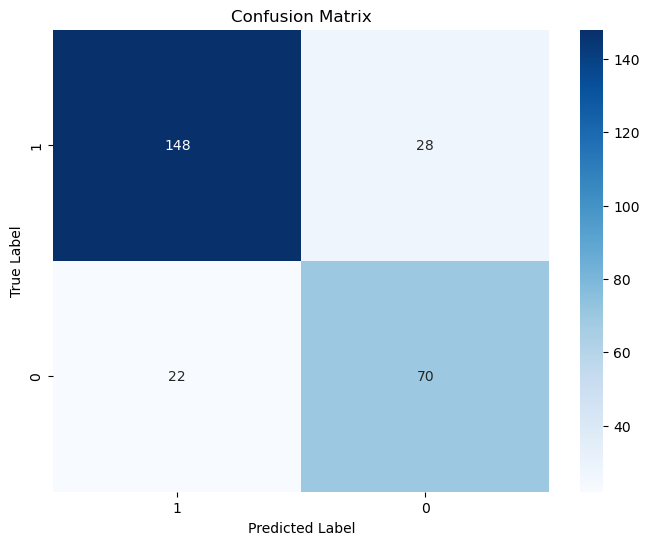

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_pred, test_y), annot=True, fmt='d', cmap='Blues', xticklabels=test_y.unique(), yticklabels=test_y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(test_y, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.792


In [19]:
# Train MLPClassifier with different activation functions
activation_functions = ['logistic', 'tanh', 'relu']
solver_alg = ['lbfgs', 'sgd', 'adam']

for activation in activation_functions:
    for solv in solver_alg:
        mlp = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, solver=solv, max_iter=1000, random_state=42)
        mlp.fit(train_X, train_y)
    
        # Make predictions
        y_pred = mlp.predict(test_X)
    
        # Calculate accuracy
        accuracy = accuracy_score(test_y, y_pred)
        print(f"Activation: {activation} and Solver: {solv}, Accuracy: {accuracy:.4f}")

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation: logistic and Solver: lbfgs, Accuracy: 0.7761
Activation: logistic and Solver: sgd, Accuracy: 0.7985
Activation: logistic and Solver: adam, Accuracy: 0.7873


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation: tanh and Solver: lbfgs, Accuracy: 0.7985
Activation: tanh and Solver: sgd, Accuracy: 0.8060
Activation: tanh and Solver: adam, Accuracy: 0.8134


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation: relu and Solver: lbfgs, Accuracy: 0.7724
Activation: relu and Solver: sgd, Accuracy: 0.8396
Activation: relu and Solver: adam, Accuracy: 0.8284
